# 1) Exploratory Analysis

On the first step of analysis needs to creat DataFrame from 'mnist.csv' file. Data set contains 42000 rows and 785 columns. "Label" column is a our target (the digit) and 784 columns of features (pixels).    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


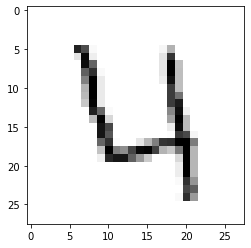

In [3]:
input_data = np.array(df.drop(["label"], axis=1))
digit_image = input_data[3].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

(array([4132.,    0.,    0.,    0.,    0., 4684.,    0.,    0.,    0.,
           0.,    0., 4177.,    0.,    0.,    0.,    0., 4351.,    0.,
           0.,    0.,    0.,    0., 4072.,    0.,    0.,    0.,    0.,
        3795.,    0.,    0.,    0.,    0.,    0., 4137.,    0.,    0.,
           0.,    0., 4401.,    0.,    0.,    0.,    0.,    0., 4063.,
           0.,    0.,    0.,    0., 4188.]),
 array([0.  , 0.18, 0.36, 0.54, 0.72, 0.9 , 1.08, 1.26, 1.44, 1.62, 1.8 ,
        1.98, 2.16, 2.34, 2.52, 2.7 , 2.88, 3.06, 3.24, 3.42, 3.6 , 3.78,
        3.96, 4.14, 4.32, 4.5 , 4.68, 4.86, 5.04, 5.22, 5.4 , 5.58, 5.76,
        5.94, 6.12, 6.3 , 6.48, 6.66, 6.84, 7.02, 7.2 , 7.38, 7.56, 7.74,
        7.92, 8.1 , 8.28, 8.46, 8.64, 8.82, 9.  ]),
 <a list of 1 Patch objects>)

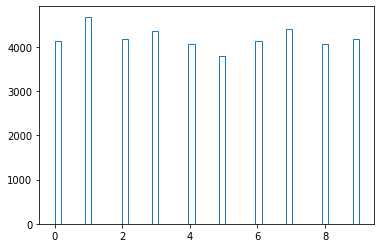

In [24]:
plt.hist(labels, bins=50, histtype='step')

In [344]:
labels = df["label"]
for i in range(10):
    count_i = labels[labels == i]
    precentege = count_i.count()/labels.count() * 100 
    print("Label {}: {:0.2f}%".format(i, precentege))

Label 0: 9.84%
Label 1: 11.15%
Label 2: 9.95%
Label 3: 10.36%
Label 4: 9.70%
Label 5: 9.04%
Label 6: 9.85%
Label 7: 10.48%
Label 8: 9.67%
Label 9: 9.97%


In [37]:
labels = df['label']
newDF = df.drop('label', axis=1)

newDF[newDF > 0] = 1

newDF = pd.concat([labels, newDF], axis=1)

In [29]:
newDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


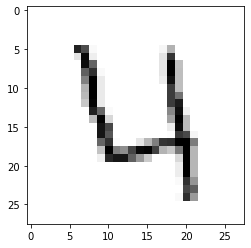

In [55]:
input_data = np.array(df.drop(["label"], axis=1))
digit_image = input_data[3].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

In [107]:
new_df = newDF 
new_df["density"] = new_df.iloc[:, 1:-1].astype(bool).sum(axis=1)

In [7]:
new_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,density
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,245
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,113
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,260


In [108]:
DF_Label_Density = new_df.iloc[:, [0,-2, -1]]

In [109]:
DF_Label_Density.head()

,label,simmetry,density
0,1,75.510204,97
1,0,90.243902,245
2,1,97.500000,79
3,4,57.894737,113
4,0,78.927203,260


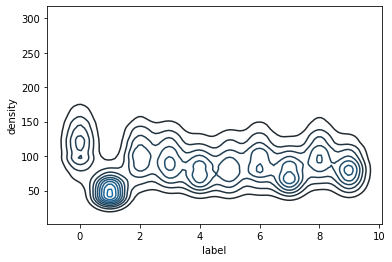

In [11]:
sns.kdeplot(DF_Label_Density["label"], DF_Label_Density["density"], )

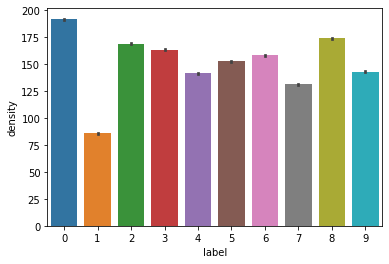

In [34]:
sns.barplot(x="label", y="density", data=DF_Label_Density, ci=68)

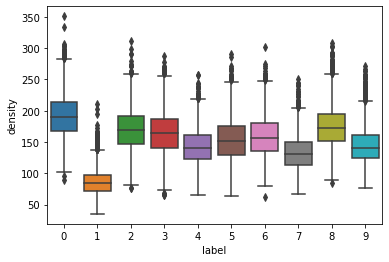

In [250]:
sns.boxplot(x="label", y="density", data=DF_Label_Density)

In [106]:
label = 9
DF_Label_Density['density'][DF_Label_Density['label'] == label].mean()

KeyError: 'density'

In [14]:
def density_analyse(data):
    mean_diff = []
    for i in range(0, 10):
        for j in range(0, 10):
            if j != i:
                mean_dense_i = DF_Label_Density['density'][DF_Label_Density['label'] == i].mean()
                mean_dense_j = DF_Label_Density['density'][DF_Label_Density['label'] == j].mean()
                mean_difference = abs(mean_dense_i - mean_dense_j)
                mean_diff.append([mean_difference, j, i])
    
    data_frame = pd.DataFrame(mean_diff, columns=["dens_diff", "label_x", "label_y"])
    sorted_df = data_frame.sort_values(by='dens_diff')
                
    return sorted_df.iloc[::2], np.array(sorted_df.iloc[1:2]).reshape(3), np.array(sorted_df.iloc[-2:-1]).reshape(3) 

In [15]:
mean_diff, min_diff, max_diff = density_analyse(DF_Label_Density)

print("Max mean density difference {:0.0f} between {} and {}".format(max_diff[0], int(max_diff[1]), int(max_diff[2])))
print("Min mean density difference {:0.0f} between {} and {}".format(min_diff[0], int(min_diff[1]), int(min_diff[2])))


Max mean density difference 106 between 0 and 1
Min mean density difference 2 between 4 and 9


In [37]:
mean_diff

,dens_diff,label_x,label_y
44,1.751924,9,4
25,5.005499,8,2
32,5.309825,6,3
29,5.448039,2,3
50,5.454588,6,5
86,9.504035,5,9
67,10.078468,4,7
34,10.453538,8,3
23,10.757864,6,2
48,10.764413,3,5


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [127]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = DF_Label_Density.loc[:,["simmetry", "density"]]
X = scale(X)
#X = normalize(X)
y = DF_Label_Density["label"]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [129]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
prediction = LR.predict(X_test)

In [120]:
accuracy_score(y_test, prediction) #only simmerty feature

0.20245310245310244

In [363]:
accuracy_score(y_test, prediction)  #only density feature

0.24725829725829726

In [131]:
accuracy_score(y_test, prediction) #simmerty and density feature

0.32704761904761903

In [132]:
confusion_matrix(y_test, prediction)

array([[ 425,    4,  149,   34,   11,    0,   32,   71,  239,   60],
       [   0, 1080,    0,    0,   17,    0,    0,   13,    6,   30],
       [ 221,   23,  218,   46,   36,    0,   76,  212,  124,  116],
       [ 209,   20,  172,   69,   65,    0,   83,  224,  165,  144],
       [  72,   69,   52,   49,  136,    0,   67,  183,  141,  255],
       [ 108,   50,  102,   38,   61,    0,   67,  218,  111,  143],
       [ 151,   17,  180,   51,   76,    0,  103,  214,   67,  151],
       [  12,   29,   69,   20,   80,    0,   72,  766,   16,   71],
       [ 258,   18,  104,   59,   28,    0,   36,   41,  296,  165],
       [  60,   62,   47,   67,  159,    0,   63,  113,  122,  341]])

In [133]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.01)


# Logistic Regression with all features

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize
from tensorflow.keras.utils import to_categorical

In [290]:
clearDF = newDF
for i in clearDF.columns:
    if clearDF[i].sum() == 0:
        clearDF.drop(i, axis=1, inplace=True)

In [142]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = newDF.iloc[:40000, 1:-2]
y = newDF.iloc[:40000, [0]]

In [141]:
newDF.iloc[:40000, 1:-2].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
prediction = LR.predict(X_test)
accuracy_score(y_test, prediction)

0.9052272727272728

In [99]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X = newDF.iloc[:, 1:]
y = newDF.iloc[:, [0]]
X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
prediction = LR.predict(X_test)
accuracy_score(y_test, prediction)

0.9068542568542568

In [75]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.00)


# Calculating simmetry 

In [145]:
#testDf = df.iloc[2]

simmetry = np.array([])
for index in range(newDF.shape[0]):
    sim_level = 0
    testDf = np.array(newDF.iloc[[index], 1:])
    total_density = testDf[0][:].astype(bool).sum() 
    i = 0
    j = 783
    while i < 392:
        if testDf[0][i] != 0 and testDf[0][j] != 0:
            sim_level += 2
        i += 1
        j -= 1
        #print("Row {}, simmetry: {}".format(index, sim_level/sum_ink))

    simmetry = np.append(simmetry, [sim_level/total_density])

In [147]:
newDF['simmetry'] = simmetry
newDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,simmetry,density
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.747475,97
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.898785,245
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.962963,79
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.573913,113
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.786260,260


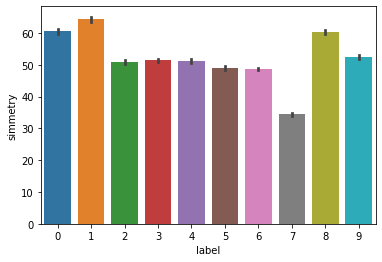

In [98]:
newDF['simmetry'] = newDF['simmetry']*100
sns.barplot(x="label", y="simmetry", data=newDF, ci=100)

In [100]:
DF_Label_Density = pd.concat([DF_Label_Density, newDF['simmetry']], axis=1)

In [104]:
DF_Label_Density.drop('simmetry', axis=1, inplace=True)

In [105]:
DF_Label_Density.head()

,label
0,1
1,0
2,1
3,4
4,0
